CFDoRF - Exercise 1: Finite difference method

We'll be solving a simple advection - diffusion equation: yt + uytx == D yxx

Setup and Data:

In [1]:
# Libraries
from numpy import exp, sin, pi, linspace, zeros, meshgrid, array, append, amax
from matplotlib import pyplot as plt
from matplotlib import cm, animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import timeit

# Start timing:
start = timeit.default_timer()

# Discretization:
NP = 21; # [-] Number of grid points
NT = 100; #[-] Number of time steps
L = 2; #[m] Length of the domain
h = L/(NP-1); #[m] space step
dt = 0.05; #[s] time step
xspan = linspace(0,L,NP); #[m] space domain
tspan = linspace(0,NT*dt,NT); #[s] time domain

# Constants:
D = 0.05; #[m^2/s] Diffusivity
u = 1; #[m/s] Speed


We first compute the analytical solution, for comparison:

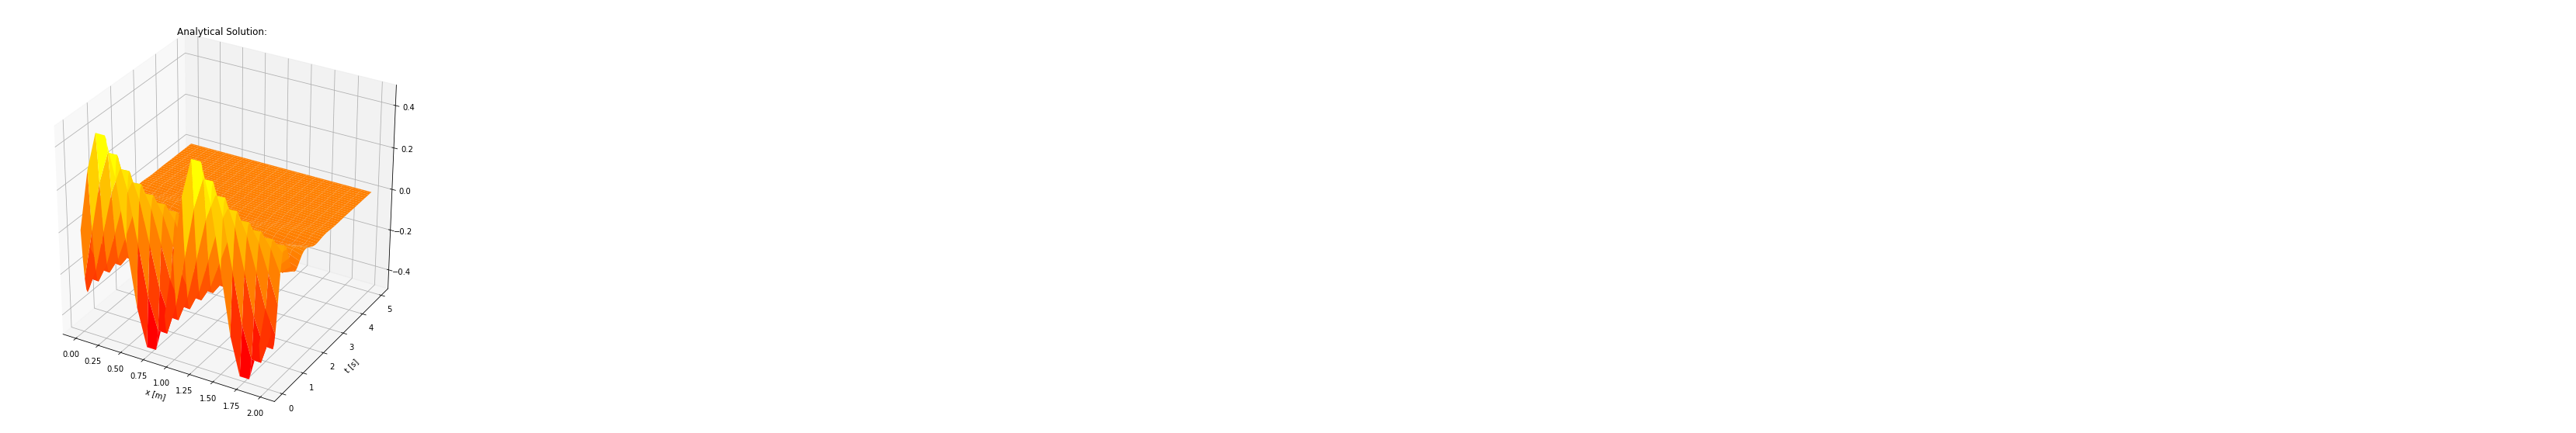

In [2]:
# Function:
def analytical_solution(x,t):
    a = exp(-4*pi**2*D*t)*0.5*sin(2*pi*(x-u*t))
    return a

# Compute it in every point of the domain:
A = [[0.0 for j in range(NP)] for i in range(NT)]; # Initialize list A
for i in range(NT):
    for j in range(NP):
        l = analytical_solution(xspan[j],tspan[i])
        A[i][j] = l      


# Turn A into an array so that it can be used by plot_surface
A = array(A); 

#Plot:
fig = plt.figure(num=1, figsize = [10, 10])
ax = fig.gca(projection='3d')
X, T = meshgrid(xspan,tspan)
surf = ax.plot_surface(X, T, A, cmap = cm.autumn)
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.title('Analytical Solution:')
plt.show()

Numerical solution by using the Finite-Difference Method:

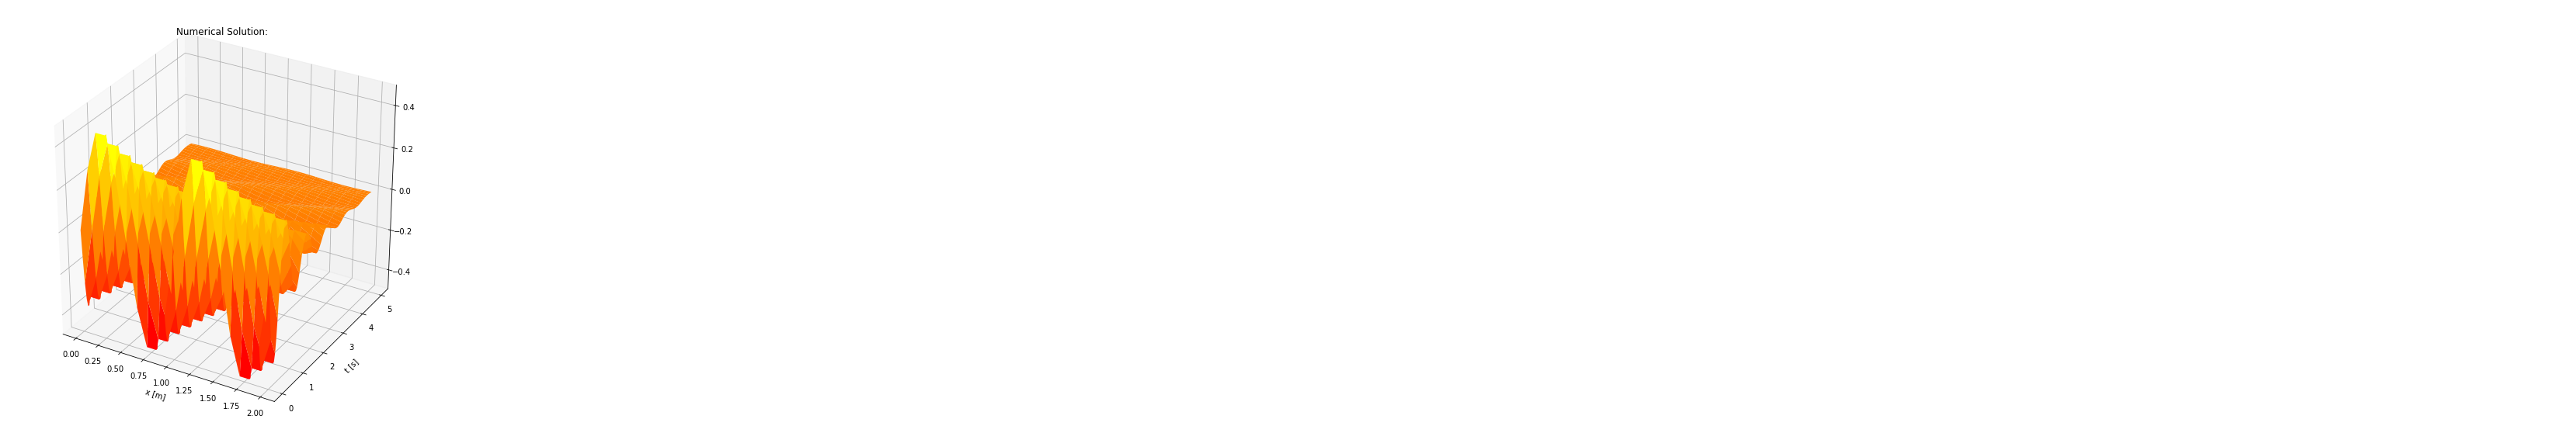

In [3]:
# Allocate memory for the solution matrix:
F = [[0.0 for j in range(NP)] for i in range(NT)]

# Initial condition:
for j in range(NP):
    F[0][j] = 0.5*sin(2*pi*xspan[j]);
    
# Internal points:
for i in range(1,NT):
    f0 = F[i-1]# @ time j-1
    
    for j in range(1,NP-1):
        F[i][j] = f0[j]-u*dt/2/h*(f0[j+1]-f0[j-1])+D*dt/(h**2)*(f0[j+1]-2*f0[j]+f0[j-1])
    # Periodic boundary conditions:
    j = NP-1
    F[i][NP-1] =  f0[j]-u*dt/2/h*(f0[2]-f0[j-1])+D*dt/(h**2)*(f0[2]-2*f0[j]+f0[j-1])
    F[i][0] = F[i][NP-1];
  
# Turn F into an array so that it can be used by plot_surface
F = array(F); 

#Plot:
fig = plt.figure(num=2, figsize = [10, 10])
ax = fig.gca(projection='3d')
X, T = meshgrid(xspan,tspan)
surf = ax.plot_surface(X, T, F, cmap = cm.autumn)
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.title('Numerical Solution:')
plt.show()


Let's make an animated plot that shows the solution at each time step:

In [4]:
# Let's set up the figure - Limits:
fig = plt.figure(num=2, figsize = [7, 4])
xlim = (xspan[0], xspan[-1]) # -1 is the last element of the array
AF = append(A,F,1);
ylim = (-2*amax(-AF),2*amax(AF)); 
ax = plt.axes(xlim = xlim, ylim = ylim);

# Let's set up the figure - Labels and title:
plt.xlabel('x[m]')
plt.ylabel('[-]')
plt.title('Analytical vs. Numerical solution:')
plt.grid(color='g', linestyle='-.', linewidth=0.1)

# Empty Line:
lineA, = plt.plot([],[],'-b', animated=True)
lineF, = plt.plot([],[],'-r', animated=True)
plt.legend((lineA,lineF),('Analytical','Numerical'))

# Initialize function: 
def init():
    lineA.set_data([],[])
    lineF.set_data([],[])
    return lineA, lineF

# Updeate function:
def update(frame):
    lineA.set_data(xspan,A[frame])
    lineF.set_data(xspan,F[frame])    
    return lineA, lineF

# Animation:
anim = animation.FuncAnimation(fig, update, init_func=init, \
                               frames=NT, interval=100, blit=True)

# Close plot so it doesn't show up:
plt.close()

# Show video:
HTML(anim.to_html5_video())

Show how long did it take to execute the script:

In [5]:
stop = timeit.default_timer()
execution_time = stop-start
print('Script executed in {:2.2f} [s]'.format(execution_time)) 

Script executed in 16.95 [s]
